In [119]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go

In [120]:
# import csv

data_adidas = pd.read_excel('xxx/Adidas US Sales Datasets.xlsx')
data_adidas.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [121]:
# shape of the dataframe 
data_adidas.shape

(9648, 13)

In [122]:
# check duplicates
data_adidas.duplicated().sum()

0

In [123]:
# check info
data_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [124]:
# null values
data_adidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [125]:
# remove non-numerical characters from the columns 
data_adidas['Total Sales'] = data_adidas['Total Sales'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data_adidas['Units Sold'] = data_adidas['Units Sold'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data_adidas['Operating Profit'] = data_adidas['Operating Profit'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)
data_adidas['Operating Margin'] = data_adidas['Operating Margin'].astype(str).str.replace(r'[$, ]', '', regex=True).astype(float)

In [126]:
# Convert Invoice Date to Datetime Object
data_adidas['Invoice Date'] = pd.to_datetime(data_adidas['Invoice Date'])

In [127]:
# Find the total revenue

total_revenue = data_adidas['Total Sales'].sum()
total_revenue

899902125.0

In [128]:
## 1. Analysis of sales performance, which products are successful and not

# Agregating total sales and units sold for each product
product_sales = data_adidas.groupby('Product').agg({'Total Sales': 'sum', 'Units Sold': 'sum'}).reset_index()

# Sorting products by total sales in descending order to indentify top-performing products
top_performing_products = product_sales.sort_values(by='Total Sales', ascending=False).head()

# Displaying the results
print("\nTop-performing products:")
top_performing_products


Top-performing products:


,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320.0
3,Women's Apparel,179038860.0,433827.0
1,Men's Athletic Footwear,153673680.0,435526.0
5,Women's Street Footwear,128002813.0,392269.0
0,Men's Apparel,123728632.0,306683.0


In [129]:
# Sorting products by total sales in ascending order to indentify underperforming products
underperforming_products = product_sales.sort_values(by='Total Sales', ascending=True).head()

# Displaying the results
print("\nUnderperforming products:")
underperforming_products


Underperforming products:


,Product,Total Sales,Units Sold
4,Women's Athletic Footwear,106631896.0,317236.0
0,Men's Apparel,123728632.0,306683.0
5,Women's Street Footwear,128002813.0,392269.0
1,Men's Athletic Footwear,153673680.0,435526.0
3,Women's Apparel,179038860.0,433827.0


In [130]:
## 2. Regional market analysis: which stores show high sales and not?

# Group by 'City' and 'Retailer', and sum the 'Units Sold'
three_columns_grouped = data_adidas.groupby(['City', 'Retailer'])['Units Sold'].sum().reset_index()

# Sorting the results within each city to find the top and worst perfoming reailers 
three_columns_sorted = three_columns_grouped.sort_values(by=['City', 'Units Sold'], ascending=[True, False])

# Getting the top performing retailer in each city
top_performers = three_columns_sorted.groupby('City').head(1)

# Getting the worst performing retailer in each city
worst_performers = three_columns_sorted.groupby('City').tail(1)

# Display the result
print("\nTop Performing Retailers in Each City:")
top_performers.head()


Top Performing Retailers in Each City:


,City,Retailer,Units Sold
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
4,Anchorage,Amazon,26749.0
7,Atlanta,Sports Direct,41414.0
8,Baltimore,Foot Locker,9322.0


In [131]:
# Display the result
print("\nWorst Performing Retailers in Each City:")
worst_performers.head()


Worst Performing Retailers in Each City:


,City,Retailer,Units Sold
0,Albany,Kohl's,10053.0
3,Albuquerque,Sports Direct,8881.0
5,Anchorage,Foot Locker,4066.0
6,Atlanta,Foot Locker,14977.0
10,Baltimore,West Gear,5647.0


In [132]:
## 3. Profit margin analysis

# Correlation between Operating Profit and Total Sales
correlation_op_ts = data_adidas['Operating Profit'].corr(data_adidas['Total Sales'])
correlation_op_ts

0.9563074349716078

In [133]:
# Correlation between Operating Profit and Units Sold
correlation_op_us = data_adidas['Operating Profit'].corr(data_adidas['Units Sold'])
correlation_op_us

0.8923793765537953

In [134]:
three_columns_grouped

,City,Retailer,Units Sold
0,Albany,Kohl's,10053.0
1,Albany,West Gear,47133.0
2,Albuquerque,Kohl's,43752.0
3,Albuquerque,Sports Direct,8881.0
4,Anchorage,Amazon,26749.0
...,...,...,...
103,St. Louis,West Gear,7527.0
104,Wichita,Foot Locker,8940.0
105,Wichita,Kohl's,20523.0
106,Wilmington,Foot Locker,20924.0


In [135]:
## 4. The effectiveness of sales methods: which sales method is more effective — in-store or online?

effectiveness_sales_methods = data_adidas.groupby(['Sales Method']).agg({'Total Sales': 'sum', 'Operating Profit': 'sum', 'Operating Margin': 'mean'})
effectiveness_sales_methods

,Total Sales,Operating Profit,Operating Margin
Sales Method,,,
In-store,356643750.0,1.275913e+08,0.356121
Online,247672882.0,9.655518e+07,0.464152
Outlet,295585493.0,1.079883e+08,0.394876


In [136]:
## 5. Price Optimization: Is there a certain price range that provides better sales than others?

# Creating intervals from 0 to 130 in increments of 10
interval_price = list(range(0, 140, 10))
labels = [f"{interval_price[i]}-{interval_price[i+1]}" for i in range(len(interval_price)-1)]

# Add column 'Price Range'
data_adidas['Price Range'] = pd.cut(data_adidas['Price per Unit'], bins=interval_price, labels=labels)

In [137]:
# Aggregation of sales data
total_interval_price = data_adidas.groupby(['Price Range'], observed=False)['Total Sales'].sum().reset_index()

# Sorting for insights and Final analysis
sort_total_interval_price = total_interval_price.sort_values(by='Total Sales', ascending=False)
sort_total_interval_price

,Price Range,Total Sales
4,40-50,220666307.0
5,50-60,210865002.0
6,60-70,190679285.0
3,30-40,134726187.0
7,70-80,52787579.0
8,80-90,33547420.0
2,20-30,29636023.0
9,90-100,14468685.0
1,10-20,6574478.0
11,110-120,3080000.0


In [138]:
## 6. Product Portfolio Optimization: Determine which products are the most profitable, segmented by location

# Group by 'City' and 'Product', and sum the 'Total Sales'
product_cities_grouped = data_adidas.groupby(['Product', 'City'])['Total Sales'].sum().reset_index()

# Getting the top products in each city 
best_product_cities = product_cities_grouped.loc[product_cities_grouped.groupby('Product')['Total Sales'].idxmax()]

# Getting the worst products in each city
worst_product_cities = product_cities_grouped.loc[product_cities_grouped.groupby('Product')['Total Sales'].idxmin()]

# Join results
result_product_cities = pd.concat([best_product_cities.assign(), worst_product_cities.assign()])

# Sort and reset index
result_product_cities = result_product_cities.sort_values(by='Product').reset_index(drop=True)

# Display the result
print("\nBest and Worst Performing Cities for Each Product:")
result_product_cities


Best and Worst Performing Cities for Each Product:


,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Omaha,530197.0
2,Men's Athletic Footwear,New York,6301528.0
3,Men's Athletic Footwear,Omaha,942983.0
4,Men's Street Footwear,Charleston,9479502.0
5,Men's Street Footwear,Omaha,2131074.0
6,Women's Apparel,Charleston,8147789.0
7,Women's Apparel,Omaha,1202661.0
8,Women's Athletic Footwear,New York,5201048.0
9,Women's Athletic Footwear,Omaha,465677.0


In [139]:
## 7. Market Expansion Opportunities: Rate the best and worst stores based on their location

# Group by 'City' and 'Product', and sum the 'Total Sales'
market_expansion_opportunities = data_adidas.groupby(['City', 'Retailer'])[['Total Sales', 'Operating Profit']].sum().reset_index()

# Add column 'Profit Margin'
market_expansion_opportunities['Profit Margin'] = market_expansion_opportunities['Operating Profit'] / market_expansion_opportunities['Total Sales'] 
market_expansion_opportunities['Profit Margin'] = market_expansion_opportunities['Profit Margin'].round(6)

# Sort
market_expansion_opportunities = market_expansion_opportunities.sort_values(by=['City','Retailer'], ascending=[True, False])

# Display the result
print("\nStore Performance by City:")
market_expansion_opportunities


Store Performance by City:


,City,Retailer,Total Sales,Operating Profit,Profit Margin
1,Albany,West Gear,20735165.0,8062399.80,0.388827
0,Albany,Kohl's,3692639.0,1367451.11,0.370318
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
5,Anchorage,Foot Locker,1388078.0,354541.11,0.255419
...,...,...,...,...,...
102,St. Louis,Foot Locker,7982132.0,3225752.11,0.404122
105,Wichita,Kohl's,6451914.0,2279774.62,0.353349
104,Wichita,Foot Locker,3520950.0,1230372.67,0.349443
107,Wilmington,Kohl's,3910844.0,1446997.38,0.369996


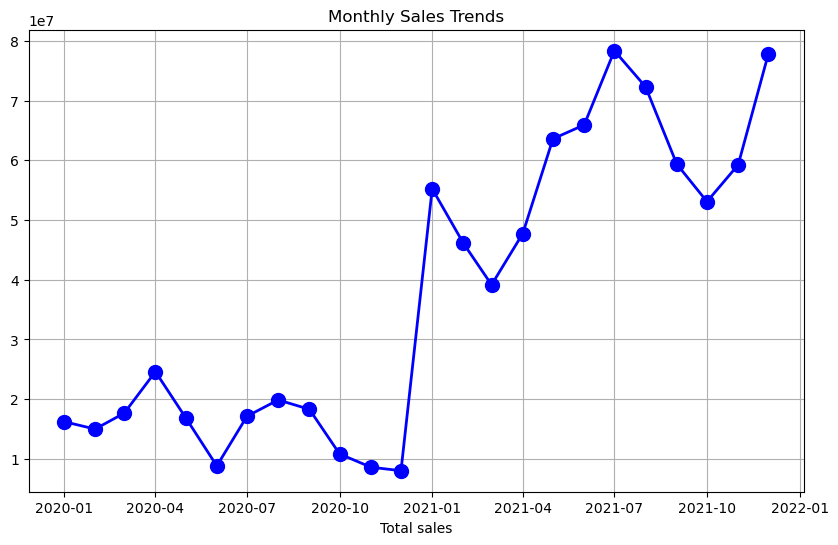

In [207]:
## 8. Time Series Analysis: Investigate whether there has been a consistent sales trend over time or any noticeable monthly trends.

# Create total month sales 
total_monthly_sales = data_adidas.groupby(data_adidas['Invoice Date'].dt.to_period('M')).agg({'Total Sales': 'sum'}).reset_index()
total_monthly_sales['Invoice Date'] = monthly_sales['Invoice Date'].dt.to_timestamp()

# Rename column
total_monthly_sales.rename(columns={'Invoice Date':'Date'})

# Add histogram
plt.figure(figsize=(10,6))
plt.plot(total_monthly_sales['Invoice Date'], total_monthly_sales['Total Sales'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=10)
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.xlabel('Total sales')
plt.grid(True)
plt.show()

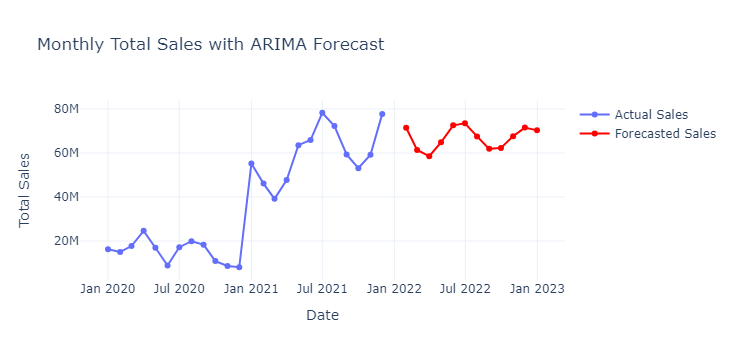

In [208]:
## 9. Predictive Sales Analysis: Develop a forecast for monthly sales

# Setting the 'Invoice Date' as an index
total_monthly_sales.set_index('Invoice Date', inplace=True)

# Setting the frequency'MS' (Month Start)
total_monthly_sales = total_monthly_sales.asfreq('MS')

# Building and training an ARIMA model with parameters (2,1,2)
model = ARIMA(total_monthly_sales['Total Sales'], order=(2, 1, 2))
model_fit = model.fit()

# Forecasting for the next year (12 months)
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=total_monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_sales = forecast.predicted_mean

# Creating a DataFrame for future_sales forecasts
future_sales = pd.DataFrame({'Invoice Date': forecast_index, 'Total Sales': forecast_sales
})

# Setting the 'Invoice Date' how is the index in future_sales
future_sales.set_index('Invoice Date', inplace=True)

# Visualization with plotly
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(x=total_monthly_sales.index, y=total_monthly_sales['Total Sales'], mode='lines+markers', name='Actual Sales'))

# Projected data
fig.add_trace(go.Scatter(x=future_sales.index, y=future_sales['Total Sales'],mode='lines+markers', name='Forecasted Sales', line=dict(color='red')))

fig.update_layout(title='Monthly Total Sales with ARIMA Forecast',
xaxis_title='Date',
yaxis_title='Total Sales',
template='plotly_white')

fig.show()